In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd                    # For data manipulation
import numpy as np                     # For numerical operations
import re                              # For regular expressions (used in text cleaning)
import nltk                            # Natural Language Toolkit, for NLP tasks
import os                              # For interacting with the operating system
import matplotlib.pyplot as plt        # For plotting graphs
import seaborn as sns                  # For prettier statistical plots

nltk.download('punkt')                 # Downloads the tokenizer for breaking text into words/sentences
nltk.download('stopwords')             # Downloads a list of common English stopwords (like 'the', 'is', etc.)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
file_path = "/content/drive/MyDrive/resume_datasets/UpdatedResumeDataSet.csv.zip"

# Loading dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display basic information about the dataset:
# - df.shape: shows (rows, columns)
# - df.columns.tolist(): lists all column names
# - df.head(2): shows the first two rows of the dataset
df.shape, df.columns.tolist(), df.head(2)

((962, 2),
 ['Category', 'Resume'],
        Category                                             Resume
 0  Data Science  Skills * Programming Languages: Python (pandas...
 1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...)

In [ ]:
# Import stopwords from NLTK (like 'and', 'the', 'is', etc.)
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Function to clean and preprocess the resume text
def preprocess_text(text):
    # Remove all non-word characters (punctuation, symbols, etc.) and lowercase the text
    text = re.sub(r'\W+', ' ', text.lower())

    # Split text into individual words (tokens)
    tokens = text.split()

    # Remove all stopwords from the tokens
    filtered = [word for word in tokens if word not in stop_words]

    # Join the remaining words back into a cleaned string
    return " ".join(filtered)

# Create a new column 'Cleaned_Resume' with the cleaned version of each resume
df["Cleaned_Resume"] = df["Resume"].apply(preprocess_text)

# Display original and cleaned resumes side-by-side (first 2 rows)
df[["Resume", "Cleaned_Resume"]].head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Resume,Cleaned_Resume
0,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 may 2017 b e uit rg...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

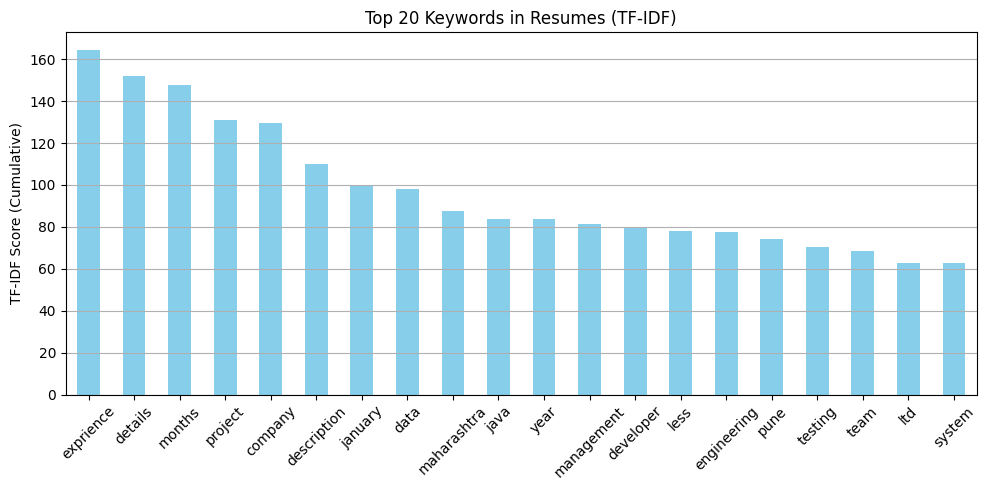

In [ ]:
tfidf = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf.fit_transform(df["Cleaned_Resume"])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Visualize top 20 keywords
top_keywords = tfidf_df.sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 5))
top_keywords.plot(kind='bar', color='skyblue')
plt.title("Top 20 Keywords in Resumes (TF-IDF)")
plt.ylabel("TF-IDF Score (Cumulative)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**In order to obtain most effective model we have trained and tested our model** **using various algorithms such as below:**

**KNN: Baseline model using similarity with TF-IDF features.**

**Random Forest: Improves accuracy and gives confidence scores.**

**SVM: Reduces overfitting with better decision boundaries.**

**BERT + LR: Understands resume context using BERT embeddings.**

**Hybrid (TF-IDF + BERT + LR): Combines keyword relevance (TF-IDF) and deep** **understanding (BERT) for the most accurate and confident predictions.**


---


**We selected the Hybrid model as our final choice for its strong balance of** **precision, context, and interpretability.**

---






---
**TRAINING AND TESTING OUR MODEL AGAINST A KAGGLE REAL-TIME DATASET**
---





> **(a real-world, multi-class resume dataset sourced from Kaggle.)**





In [ ]:
!pip install sentence-transformers PyPDF2 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.3 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
from collections import defaultdict
from PyPDF2 import PdfReader

In [ ]:
# PDF Extraction
def extract_text_from_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    return "\n".join([page.extract_text() for page in reader.pages if page.extract_text()])

In [ ]:
# df["Cleaned_Resume"] already exists

In [ ]:
# Feature Extraction
print("Generating TF-IDF features...")
tfidf_vectorizer = TfidfVectorizer(max_features=300)
X_tfidf = tfidf_vectorizer.fit_transform(df["Cleaned_Resume"]).toarray()

print("Generating BERT features (cached if available)...")
if os.path.exists("bert_embeddings.npy"):
    X_bert = np.load("bert_embeddings.npy")
else:
    bert_model = SentenceTransformer("all-MiniLM-L6-v2")
    X_bert = bert_model.encode(
        df["Cleaned_Resume"].tolist(),
        convert_to_numpy=True,
        batch_size=32,
        show_progress_bar=True
    )
    np.save("bert_embeddings.npy", X_bert)

X_hybrid = np.hstack((X_tfidf, X_bert))
y = df["Category"]


Generating TF-IDF features...
Generating BERT features (cached if available)...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/31 [00:00<?, ?it/s]

In [ ]:
# Train-Test Split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)
X_train_bert, X_test_bert, _, _ = train_test_split(X_bert, y, test_size=0.2, stratify=y, random_state=42)
X_train_hybrid, X_test_hybrid, _, _ = train_test_split(X_hybrid, y, test_size=0.2, stratify=y, random_state=42)

# Standardize hybrid
scaler = StandardScaler()
X_train_hybrid = scaler.fit_transform(X_train_hybrid)
X_test_hybrid = scaler.transform(X_test_hybrid)


In [ ]:
# Define and Train Models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True),
    "BERT + LR": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Hybrid (TF-IDF + BERT + LR)": LogisticRegression(max_iter=1000, class_weight='balanced')
}

X_train_dict = {
    "Random Forest": X_train_tfidf,
    "KNN": X_train_tfidf,
    "SVM": X_train_tfidf,
    "BERT + LR": X_train_bert,
    "Hybrid (TF-IDF + BERT + LR)": X_train_hybrid
}

X_test_dict = {
    "Random Forest": X_test_tfidf,
    "KNN": X_test_tfidf,
    "SVM": X_test_tfidf,
    "BERT + LR": X_test_bert,
    "Hybrid (TF-IDF + BERT + LR)": X_test_hybrid
}



In [ ]:
# Evaluate
results = []
full_reports = {}

for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train_dict[name], y_train)
    y_pred = model.predict(X_test_dict[name])
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, zero_division=0)
    results.append((name, acc, f1))
    full_reports[name] = report

model_results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])


 Training Random Forest...

 Training KNN...

 Training SVM...

 Training BERT + LR...

 Training Hybrid (TF-IDF + BERT + LR)...



 Model Comparison Results:
                         Model  Accuracy  F1 Score
0                Random Forest  0.994819  0.994931
1                          KNN  0.968912  0.968692
2                          SVM  0.989637  0.989532
3                    BERT + LR  0.974093  0.971805
4  Hybrid (TF-IDF + BERT + LR)  0.994819  0.994931


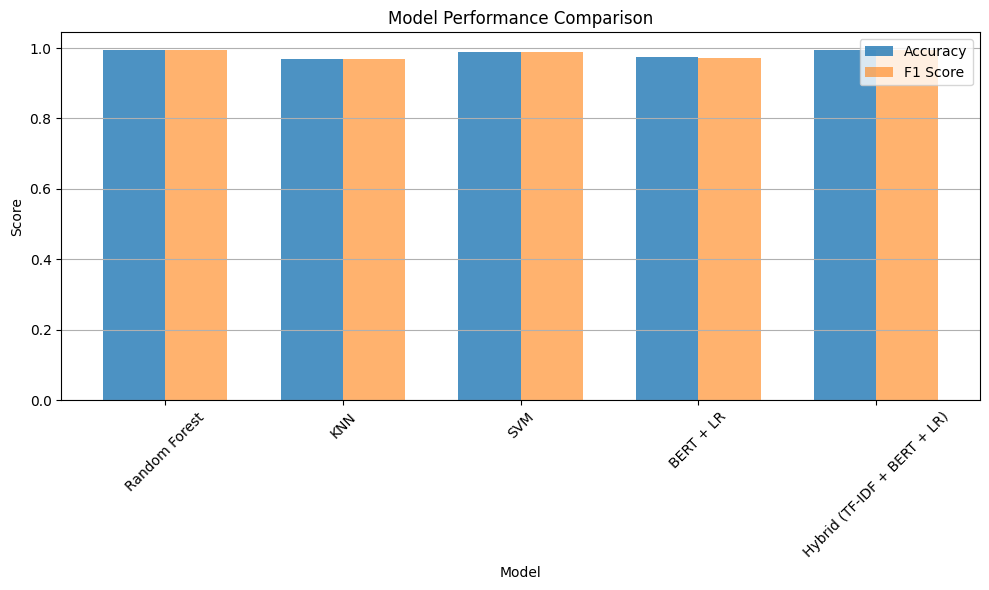

In [ ]:
# Plot
print("\n Model Comparison Results:")
print(model_results_df)

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(model_results_df))

plt.bar(index, model_results_df["Accuracy"], bar_width, label='Accuracy', alpha=0.8)
plt.bar(index + bar_width, model_results_df["F1 Score"], bar_width, label='F1 Score', alpha=0.6)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width / 2, model_results_df["Model"], rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
print("\n\nDetailed Classification Reports")
for i, (model_name, report) in enumerate(full_reports.items(), start=1):
    print(f"\n {i}. {model_name}:")
    print(report)




Detailed Classification Reports

 1. Random Forest:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9
       



---
**EXPERIMENTING WITH THE SAMPLE RESUME DATA**
---



**The NER code snippet extracts and displays important entities like names, organizations, locations, and dates from resume text using spaCy’s pretrained model.**

In [ ]:
!pip install spacy --quiet
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 103.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
from tabulate import tabulate
from collections import Counter

In [ ]:
# Load English model
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities with label meanings
def extract_entities(resume_text):
    doc = nlp(resume_text)
    return [(ent.text, ent.label_, spacy.explain(ent.label_)) for ent in doc.ents]

# Function to display entities in tabular form and summary count
def display_entities(resume_text):
    entities = extract_entities(resume_text)
    if not entities:
        print("No named entities found.")
        return

    print("\n Named Entities Found:\n")
    print(tabulate(entities, headers=["Entity", "Label", "Explanation"], tablefmt="grid"))

    label_counts = Counter([label for _, label, _ in entities])
    print("\n Summary of Entity Types:")
    for label, count in label_counts.items():
        print(f"- {label} ({spacy.explain(label)}): {count}")

# Test with a sample resume string
sample_resume = """
John Doe is a data analyst with experience at Google and Microsoft from 2018 to 2022.
He graduated from Stanford University and currently lives in New York.
"""

display_entities(sample_resume)



 Named Entities Found:

+---------------------+---------+-----------------------------------------+
| Entity              | Label   | Explanation                             |
+=====================+=========+=========================================+
| John Doe            | PERSON  | People, including fictional             |
+---------------------+---------+-----------------------------------------+
| Google              | ORG     | Companies, agencies, institutions, etc. |
+---------------------+---------+-----------------------------------------+
| Microsoft           | ORG     | Companies, agencies, institutions, etc. |
+---------------------+---------+-----------------------------------------+
| 2018                | DATE    | Absolute or relative dates or periods   |
+---------------------+---------+-----------------------------------------+
| Stanford University | ORG     | Companies, agencies, institutions, etc. |
+---------------------+---------+------------------------------



---
**Skill Gap Analysis:**
---



In [ ]:
# Required Libraries
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [ ]:
# Download stopwords (punkt is no longer needed)
nltk.download('stopwords')

# English stopword set
stop_words = set(stopwords.words('english'))

# Use RegexpTokenizer instead of word_tokenize to avoid 'punkt_tab' error
def extract_skills(text):
    text = re.sub(r'\W+', ' ', text.lower())               # Lowercase + remove punctuation
    tokenizer = RegexpTokenizer(r'\w+')                    # Alphanumeric tokenization
    tokens = tokenizer.tokenize(text)                      # Tokenize
    filtered = [word for word in tokens if word not in stop_words and len(word) > 2]
    return set(filtered)

# Generate learning links for missing skills
def get_learning_links(skill):
    return {
        "skill": skill,
        "coursera": f"https://www.coursera.org/search?query={skill}",
        "youtube": f"https://www.youtube.com/results?search_query={skill}+tutorial"
    }

# Sample resume and job description
resume_text = """
Experienced in Python, SQL, Excel, and data visualization. Built ML models and dashboards using Tableau and Power BI.
"""

job_description = """
We are looking for a candidate with strong knowledge of Python, SQL, machine learning, cloud computing, and Apache Spark.
Experience with Excel, Tableau, and Power BI is a plus.
"""

# Extract skill sets
resume_skills = extract_skills(resume_text)
job_skills = extract_skills(job_description)

# Skill comparison
matched_skills = resume_skills & job_skills
missing_skills = job_skills - resume_skills

# Display results
print("Skills in Resume:", sorted(resume_skills))
print("Required Skills:", sorted(job_skills))
print("Matched Skills:", sorted(matched_skills))
print("Missing Skills:", sorted(missing_skills))

# learning resources for missing skills
print("\nSuggested Learning Resources:")
for skill in sorted(missing_skills):
    links = get_learning_links(skill)
    print(f"- {skill.capitalize()}:")
    print(f"   Coursera: {links['coursera']}")
    print(f"   YouTube : {links['youtube']}")


Skills in Resume: ['built', 'dashboards', 'data', 'excel', 'experienced', 'models', 'power', 'python', 'sql', 'tableau', 'using', 'visualization']
Required Skills: ['apache', 'candidate', 'cloud', 'computing', 'excel', 'experience', 'knowledge', 'learning', 'looking', 'machine', 'plus', 'power', 'python', 'spark', 'sql', 'strong', 'tableau']
Matched Skills: ['excel', 'power', 'python', 'sql', 'tableau']
Missing Skills: ['apache', 'candidate', 'cloud', 'computing', 'experience', 'knowledge', 'learning', 'looking', 'machine', 'plus', 'spark', 'strong']

Suggested Learning Resources:
- Apache:
   Coursera: https://www.coursera.org/search?query=apache
   YouTube : https://www.youtube.com/results?search_query=apache+tutorial
- Candidate:
   Coursera: https://www.coursera.org/search?query=candidate
   YouTube : https://www.youtube.com/results?search_query=candidate+tutorial
- Cloud:
   Coursera: https://www.coursera.org/search?query=cloud
   YouTube : https://www.youtube.com/results?search_q

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




---
**ATS Score Calculation, Suggestions to improve, improved ATS Score:**
---



In [ ]:
#Sample resume and job description
resume_text = """
Experienced data analyst skilled in Python, SQL, and Excel. Built dashboards using Tableau and Power BI.
Managed cross-functional teams and optimized data pipelines using cloud services.
"""

job_description = """
Looking for a data analyst experienced in Python, SQL, cloud platforms, and data visualization tools like Tableau or Power BI.
Must be proactive, results-driven, and able to lead projects independently.
"""

In [ ]:
# keywords and action verbs
keywords = ["python", "sql", "excel", "tableau", "power bi", "cloud", "data", "visualization", "projects", "apache", "spark"]
action_verbs = ["developed", "created", "led", "managed", "analyzed", "built", "designed", "implemented", "optimized"]

# Preprocess text
def preprocess(text):
    return re.sub(r'\W+', ' ', text.lower())

clean_resume = preprocess(resume_text)
clean_jd = preprocess(job_description)

# Function for scoring, suggestions, and simulation
def ats_score_with_simulation(resume, jd, keywords, action_verbs):
    feedback = []

    # Check keywords
    keyword_hits = [kw for kw in keywords if kw in resume]
    missing_keywords = [kw for kw in keywords if kw not in resume]
    keyword_score = len(keyword_hits) / len(keywords)

    # Action verbs
    action_hits = [verb for verb in action_verbs if verb in resume]
    action_score = 1 if len(action_hits) >= 2 else 0.5 if len(action_hits) == 1 else 0

    # Length
    word_count = len(resume.split())
    length_score = 1 if word_count >= 100 else 0.5 if word_count >= 50 else 0

    # Final current score
    current_score = round((0.5 * keyword_score + 0.3 * action_score + 0.2 * length_score) * 100, 2)

    # Simulated perfect score
    improved_score = round((0.5 * 1 + 0.3 * 1 + 0.2 * 1) * 100, 2)

    # Suggestions
    if missing_keywords:
        feedback.append(f"Add missing keywords: {', '.join(missing_keywords)}")
    if len(action_hits) < 2:
        feedback.append("Use more strong action verbs like: developed, led, managed, built, etc.")
    if word_count < 100:
        feedback.append(f"Your resume is short ({word_count} words). Add more detail to strengthen it.")

    return current_score, improved_score, feedback

# Run it
score_now, score_if_improved, suggestions = ats_score_with_simulation(clean_resume, clean_jd, keywords, action_verbs)

# Output
print(f"\n Current ATS Score: {score_now}/100")
if suggestions:
    print("\nSuggestions to Improve:")
    for tip in suggestions:
        print(tip)
    print(f"\n If you apply these suggestions, your ATS Score could improve to: {score_if_improved}/100")
else:
    print(" Excellent! Your resume is already well-optimized for ATS.")



 Current ATS Score: 61.82/100

Suggestions to Improve:
Add missing keywords: visualization, projects, apache, spark
Your resume is short (27 words). Add more detail to strengthen it.

 If you apply these suggestions, your ATS Score could improve to: 100.0/100




---
**Job Recommendation System:**
---



**Goal: To build a system that will match the given resume with the resume of a person who secured job and returns the resumes which are matched, job category, and the criteria**

In [ ]:
sample_resume = """
Experienced in Python, SQL, deep learning, and NLP. Created intelligent chatbots and managed multiple data science projects using scikit-learn and transformers.
"""

**Recommends the most suitable job categories for a resume by comparing it to selected resumes.**

**Shows common keywords, confidence score, and allows TF-IDF or BERT embedding.**


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def vectorize_resume(resume_text, method='tfidf'):
    if method == 'tfidf':
        return tfidf.transform([resume_text])
    elif method == 'bert':
        return bert_model.encode([resume_text], convert_to_numpy=True)
    else:
        raise ValueError("Unsupported method. Use 'tfidf' or 'bert'.")

def recommend_jobs_with_explanation(resume_text, top_n=3, show_top_resumes=3, method='tfidf'):
    if not resume_text or not resume_text.strip():
        return " Resume content is empty. Please provide a valid resume."

    cleaned_input = preprocess_text(resume_text)
    input_vec = vectorize_resume(cleaned_input, method)

    if "Selected" not in df.columns:
        print(" 'Selected' column missing. Simulating it for demo purposes.")
        df["Selected"] = np.random.choice(["Yes", "No"], size=len(df), p=[0.3, 0.7])

    selected_df = df[df["Selected"] == "Yes"]
    if selected_df.empty:
        return " No selected resumes available to compare."

    selected_vectors = tfidf.transform(selected_df["Cleaned_Resume"])
    similarity_scores = cosine_similarity(input_vec, selected_vectors).flatten()

    top_indices = similarity_scores.argsort()[-show_top_resumes:][::-1]
    top_resumes = selected_df.iloc[top_indices]
    top_categories = top_resumes["Category"].tolist()

    input_tokens = set(cleaned_input.split())
    print("\n Common Skills with Top Resumes:\n")
    for i, (index, row) in enumerate(top_resumes.iterrows(), 1):
        resume_tokens = set(row["Cleaned_Resume"].split())
        common = input_tokens.intersection(resume_tokens)
        print(f"{i}. Resume ID: {index} | Category: {row['Category']}")
        print(f"   Common Keywords: {', '.join(list(common)[:10])}\n")

    seen = set()
    final_recommendations = []
    for cat in top_categories:
        if cat not in seen:
            seen.add(cat)
            final_recommendations.append(cat)

    print(" Final Recommended Job Categories:")
    for i, cat in enumerate(final_recommendations[:top_n], 1):
        print(f"   {i}. {cat}")

    avg_score = similarity_scores[top_indices].mean()
    confidence = round(avg_score * 100, 2)
    print(f"\n Confidence Score: {confidence}%")

    if confidence >= 80:
        print(" Excellent match!")
    elif confidence >= 60:
        print(" Good fit, with minor improvements.\n")
    elif confidence >= 40:
        print(" Moderate fit. Consider tailoring your resume.\n")
    else:
        print(" Low similarity. You may need to revise your resume for this domain.\n")

    return final_recommendations[:top_n]

recommend_jobs_with_explanation(sample_resume, method='tfidf')

 'Selected' column missing. Simulating it for demo purposes.

 Common Skills with Top Resumes:

1. Resume ID: 742 | Category: Hadoop
   Common Keywords: data, created, deep, python, using, sql, experienced

2. Resume ID: 763 | Category: Hadoop
   Common Keywords: data, created, deep, python, using, sql, experienced

3. Resume ID: 765 | Category: Hadoop
   Common Keywords: data, created, learning, using, sql

 Final Recommended Job Categories:
   1. Hadoop

 Confidence Score: 74.96%
 Good fit, with minor improvements.



['Hadoop']

**Compares a resume to a specific job category and returns similarity score and top matching resumes.**

**Useful for targeted feedback and alignment analysis.**

In [ ]:
def compare_to_category(resume_text, target_category, method='tfidf'):
    if not resume_text or not resume_text.strip():
        return " Resume content is empty. Please provide a valid resume."

    cleaned_input = preprocess_text(resume_text)
    input_vector = vectorize_resume(cleaned_input, method)

    matching_resumes = df[df["Category"] == target_category]
    if matching_resumes.empty:
        print(f" No resumes found for category '{target_category}'.")
        return

    category_vectors = tfidf.transform(matching_resumes["Cleaned_Resume"])
    similarities = cosine_similarity(input_vector, category_vectors).flatten()
    avg_similarity = similarities.mean()

    top_examples = matching_resumes.iloc[similarities.argsort()[-3:][::-1]]

    print(f"\n Comparison to '{target_category}' Resumes:")
    print(f" Average Similarity Score: {round(avg_similarity * 100, 2)}%\n")

    if avg_similarity >= 0.8:
        print(" You are a strong match for this role!")
    elif avg_similarity >= 0.6:
        print(" Good alignment with this role.")
    elif avg_similarity >= 0.4:
        print(" Decent match, but could be improved.")
    else:
        print(" Your resume is not very similar to this category.")

    print("\n Top Matching Resumes in This Category:")
    for i, row in top_examples.iterrows():
        print(f"   - Resume ID: {i} | Category: {row['Category']}")

compare_to_category(sample_resume, "Python Developer", method='tfidf')


 Comparison to 'Python Developer' Resumes:
 Average Similarity Score: 5.69%

 Your resume is not very similar to this category.

 Top Matching Resumes in This Category:
   - Resume ID: 596 | Category: Python Developer
   - Resume ID: 590 | Category: Python Developer
   - Resume ID: 584 | Category: Python Developer




---
**Section-wise Analysis:**
---



In [ ]:
def section_suggestions(resume_text):
    """
    Checks if a resume contains major sections (Experience, Education, Skills, Projects)
    and provides suggestions to improve structure and content.
    """

    suggestions = []
    present_sections = []

    # Check for empty input
    if not resume_text or not resume_text.strip():
        return {
            "present_sections": [],
            "suggestions": [" Resume content is empty."]
        }

    # Normalize resume text
    text = resume_text.lower()

    # Section header patterns
    sections = {
        "Experience": ["experience", "work experience", "professional experience"],
        "Education": ["education", "academic background", "qualifications"],
        "Skills": ["skills", "technical skills", "core skills"],
        "Projects": ["projects", "academic projects", "personal projects"],
    }

    # Check presence of sections
    for section, keywords in sections.items():
        found = any(re.search(rf"\b{kw}\b", text) for kw in keywords)
        if found:
            present_sections.append(section)
        else:
            suggestions.append(f" Your resume is missing a **{section}** section.")

    if "Experience" in present_sections:
        exp_chunk = re.findall(r"(experience|work experience|professional experience)[\s\S]{0,1000}", text)
        if exp_chunk:
            numbers = re.findall(r"\d+[\.\d+]*", exp_chunk[0])
            if len(numbers) < 3:
                suggestions.append(" Add **quantifiable results** (e.g., 'reduced cost by 20%') in your Experience section.")

    if "Skills" in present_sections:
        if not re.search(r"skills\s*:\s*\w+", text):
            suggestions.append(" Format your Skills section with **bullet points** or grouped terms for clarity.")

    return {
        "present_sections": present_sections,
        "suggestions": suggestions if suggestions else [" Great! Your resume includes all key sections."]
    }


In [ ]:
sample_resume = """
John Doe
Data Analyst | Python, SQL, Tableau

Experience
- Managed end-to-end data pipelines
- Built dashboards for marketing analytics

Education
BSc in Computer Science - ABC University

Skills
Python, SQL, Power BI
"""

feedback = section_suggestions(sample_resume)

print(" Sections Detected:", ", ".join(feedback["present_sections"]))
print("\n Suggestions:")
for tip in feedback["suggestions"]:
    print(tip)


 Sections Detected: Experience, Education, Skills

 Suggestions:
 Your resume is missing a **Projects** section.
 Add **quantifiable results** (e.g., 'reduced cost by 20%') in your Experience section.
 Format your Skills section with **bullet points** or grouped terms for clarity.


**Feedback System:**
---



In [ ]:
def resume_feedback_system(resume_text, expected_keywords=None, action_verbs=None):
    """
    Analyzes a resume for structural completeness, clarity, and ATS readiness.
    Returns feedback suggestions and an optional score.
    """

    suggestions = []
    score = 100  # Start from 100 and deduct based on issues
    present_sections = []

    if not resume_text or not resume_text.strip():
        return {
            "present_sections": [],
            "suggestions": [" Resume content is empty."],
            "score": 0
        }

    text = resume_text.lower()

    # Section Check
    sections = {
        "Experience": ["experience", "work experience", "professional experience"],
        "Education": ["education", "academic background", "qualifications"],
        "Skills": ["skills", "technical skills", "core skills"],
        "Projects": ["projects", "academic projects", "personal projects"]
    }

    for section, variants in sections.items():
        if any(re.search(rf"\b{kw}\b", text) for kw in variants):
            present_sections.append(section)
        else:
            suggestions.append(f" Missing section: **{section}**.")
            score -= 5

    # Quantifiable Experience Check
    if "Experience" in present_sections:
        exp_chunk = re.findall(r"(experience|work experience|professional experience)[\s\S]{0,1000}", text)
        if exp_chunk:
            numbers = re.findall(r"\d+[\.\d+]*", exp_chunk[0])
            if len(numbers) < 3:
                suggestions.append(" Add **quantifiable results** to your Experience section (e.g., 'improved accuracy by 15%').")
                score -= 5

    # Skills Format Check
    if "Skills" in present_sections:
        if not re.search(r"skills\s*:\s*\w+", text):
            suggestions.append(" Format your Skills section with **bullet points** or clear grouping.")
            score -= 2

    # Resume Length Check
    word_count = len(text.split())
    if word_count < 80:
        suggestions.append(f" Your resume seems short ({word_count} words). Consider expanding your content.")
        score -= 5
    elif word_count > 800:
        suggestions.append(f" Your resume is quite long ({word_count} words). Keep it concise.")
        score -= 3

    # ATS Keyword Match
    if expected_keywords:
        found = [kw for kw in expected_keywords if kw.lower() in text]
        missing = [kw for kw in expected_keywords if kw.lower() not in text]
        if missing:
            suggestions.append(f" Add missing **ATS keywords**: {', '.join(missing)}")
            score -= len(missing) * 2

    # Action Verbs
    if action_verbs:
        used_verbs = [verb for verb in action_verbs if verb.lower() in text]
        if len(used_verbs) < 3:
            suggestions.append(" Use strong **action verbs** to describe your impact (e.g., developed, led, created).")
            score -= 5

    # Final feedback
    return {
        "present_sections": present_sections,
        "suggestions": suggestions if suggestions else [" Your resume looks strong and well-structured!"],
        "score": max(score, 0)
    }


In [ ]:
sample_resume = """
John Doe
Data Analyst skilled in Python, SQL, Tableau
Experience
- Built dashboards
- Worked on large data projects

Education
B.Sc in Computer Science
Skills
Python, SQL, Excel
"""

keywords = ["python", "sql", "tableau", "data", "cloud", "visualization", "dashboard"]
action_verbs = ["developed", "created", "led", "managed", "optimized", "analyzed"]

feedback = resume_feedback_system(sample_resume, expected_keywords=keywords, action_verbs=action_verbs)

print("Sections Detected:", ", ".join(feedback["present_sections"]))
print(f"\n Resume Score: {feedback['score']}/100")
print("\n Suggestions:\n")
for s in feedback["suggestions"]:
    print(s)


Sections Detected: Experience, Education, Skills, Projects

 Resume Score: 79/100

 Suggestions:

 Add **quantifiable results** to your Experience section (e.g., 'improved accuracy by 15%').
 Format your Skills section with **bullet points** or clear grouping.
 Your resume seems short (28 words). Consider expanding your content.
 Add missing **ATS keywords**: cloud, visualization
 Use strong **action verbs** to describe your impact (e.g., developed, led, created).




---
**WORKING WITH REAL-TIME RESUME:**
---








---
**FINAL IMPLEMENTATION:**
---





---
**Resources to learn and create ATS-Friendly Resumes for free:**
---



In [ ]:
import pandas as pd

# Topics to cover
learning_topics = [
    {"Category": "Resume Basics", "Topic": "What is a Resume?", "Link": "https://novoresume.com/career-blog/what-is-a-resume"},
    {"Category": "Resume Format", "Topic": "Types of Resume Formats", "Link": "https://zety.com/blog/resume-formats"},
    {"Category": "Resume Writing", "Topic": "How to Write a Resume", "Link": "https://www.indeed.com/career-advice/resume-samples"},
    {"Category": "Resume Keywords", "Topic": "Using Keywords for ATS", "Link": "https://resumegenius.com/resume-help/resume-keywords"},
    {"Category": "Customization", "Topic": "Tailoring Resume to Job Role", "Link": "https://zety.com/blog/tailor-resume-to-job"},
    {"Category": "Action Verbs", "Topic": "Using Power Words", "Link": "https://zety.com/blog/resume-action-words"},
    {"Category": "Cover Letters", "Topic": "Writing a Cover Letter", "Link": "https://novoresume.com/cover-letter-examples"},
]

# Tools for building resumes
resume_tools = [
    {"Tool": "Canva", "Description": "Drag-and-drop resume builder with templates", "Link": "https://www.canva.com/resumes/"},
    {"Tool": "Zety", "Description": "Step-by-step guided resume builder", "Link": "https://zety.com/resume-builder"},
    {"Tool": "Novoresume", "Description": "Professional templates and resume tips", "Link": "https://novoresume.com/"},
    {"Tool": "ResumeGenius", "Description": "Pre-filled phrases and fast formatting", "Link": "https://resumegenius.com/resume-builder"},
]

# Convert to DataFrames
df_learn = pd.DataFrame(learning_topics)
df_tools = pd.DataFrame(resume_tools)

In [ ]:
import IPython.display as display

In [ ]:
print(" Learning Resources to Understand Resume Writing:\n")
display.display(df_learn)

print("\n Tools to Create a Resume:\n")
display.display(df_tools)

 Learning Resources to Understand Resume Writing:



,Category,Topic,Link
0,Resume Basics,What is a Resume?,https://novoresume.com/career-blog/what-is-a-r...
1,Resume Format,Types of Resume Formats,https://zety.com/blog/resume-formats
2,Resume Writing,How to Write a Resume,https://www.indeed.com/career-advice/resume-sa...
3,Resume Keywords,Using Keywords for ATS,https://resumegenius.com/resume-help/resume-ke...
4,Customization,Tailoring Resume to Job Role,https://zety.com/blog/tailor-resume-to-job
5,Action Verbs,Using Power Words,https://zety.com/blog/resume-action-words
6,Cover Letters,Writing a Cover Letter,https://novoresume.com/cover-letter-examples



 Tools to Create a Resume:



,Tool,Description,Link
0,Canva,Drag-and-drop resume builder with templates,https://www.canva.com/resumes/
1,Zety,Step-by-step guided resume builder,https://zety.com/resume-builder
2,Novoresume,Professional templates and resume tips,https://novoresume.com/
3,ResumeGenius,Pre-filled phrases and fast formatting,https://resumegenius.com/resume-builder




---
**Dealing with the Real-time Resume:**
---



- Reads given PDF resume

- Predicts job role using hybrid (TF-IDF + BERT + LR)

- Calculates ATS score and gives improvement tips

- Compares similarity with selected resumes

- Suggests top 3 career directions

- Links to Coursera + YouTube for your selected skills

In [ ]:
!pip install -q scikit-learn sentence-transformers pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 37.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import fitz  # PyMuPDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import files

In [ ]:
# Preprocessing Function
def preprocess(text):
    stopwords = set(["the", "and", "is", "in", "of", "on", "for", "a", "to", "with", "by", "an",
                     "this", "that", "at", "from", "as", "be", "or", "it", "are", "was", "were",
                     "has", "have", "had", "not", "but", "will", "can", "its", "into", "their"])
    text = re.sub(r'\W+', ' ', text.lower())
    return " ".join([w for w in text.split() if w not in stopwords])


In [ ]:
# Load and Preprocess Dataset
df = pd.read_csv("/content/drive/MyDrive/resume_datasets/UpdatedResumeDataSet.csv.zip")
df = df.dropna(subset=["Resume", "Category"]).drop_duplicates()
df["Cleaned_Resume"] = df["Resume"].apply(preprocess)

# TF-IDF Features
tfidf = TfidfVectorizer(max_features=500)
tfidf_features = tfidf.fit_transform(df["Cleaned_Resume"]).toarray()

# BERT Features
bert = SentenceTransformer("all-MiniLM-L6-v2")
bert_features = bert.encode(df["Resume"].tolist(), show_progress_bar=True)

# Combined Features
X = np.hstack([tfidf_features, bert_features])
y = df["Category"]

# Train/Test Split & Model
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
print("Model Trained!")

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

Model Trained!


In [ ]:
# Upload & Process Resume
print("Please upload your resume PDF")
uploaded = files.upload()
pdf_path = list(uploaded.keys())[0]

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    return "\n".join([page.get_text() for page in doc])

resume_text = extract_text_from_pdf(pdf_path)
resume_clean = preprocess(resume_text)
resume_tokens = set(resume_clean.split())


Please upload your resume PDF


Saving SaiVenkataAnilThota_Resume.pdf to SaiVenkataAnilThota_Resume.pdf


In [ ]:
# Feature Extraction for Uploaded Resume
tfidf_vec = tfidf.transform([resume_clean]).toarray()
bert_vec = bert.encode([resume_text])
user_vec = np.hstack([tfidf_vec, bert_vec])

In [ ]:
# Predict Role
predicted_role = lr_model.predict(user_vec)[0]

# Resume Similarity with Selected Resumes
if "Selected" not in df.columns:
    np.random.seed(42)
    df["Selected"] = np.random.choice(["Yes", "No"], size=len(df), p=[0.3, 0.7])

selected_df = df[df["Selected"] == "Yes"].copy()
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(selected_df["Cleaned_Resume"].tolist() + [resume_clean])
user_vector = tfidf_matrix[-1]
resume_vectors = tfidf_matrix[:-1]
similarities = cosine_similarity(user_vector, resume_vectors).flatten()
selected_df["Similarity"] = similarities

top_3 = selected_df.sort_values("Similarity", ascending=False).head(3)
top_role = top_3.iloc[0]["Category"]
top_score = round(top_3.iloc[0]["Similarity"] * 100, 2)
category_scores = selected_df.groupby("Category")["Similarity"].mean().sort_values(ascending=False)
top_job_roles = category_scores.head(3).apply(lambda x: round(x * 100, 2)).to_dict()

# Keyword-Based Role Matching
job_roles = {
    "Data Analyst": {"python", "sql", "excel", "tableau", "powerbi", "data analysis"},
    "Machine Learning Engineer": {"python", "tensorflow", "cnn", "deep learning", "random forest"},
    "Backend Developer": {"java", "spring", "springboot", "sql", "mysql", "php"},
    "Frontend Developer": {"html", "css", "javascript", "react", "ui", "ux"},
    "Full Stack Developer": {"java", "html", "css", "springboot", "react", "mysql", "php"},
    "AI Research Assistant": {"deep learning", "cnn", "research", "ai", "machine learning", "svm"}
}
role_scores = {role: len(resume_tokens & skills) / len(skills) for role, skills in job_roles.items()}
sorted_roles = sorted(role_scores.items(), key=lambda x: x[1], reverse=True)
recommended_job = sorted_roles[0][0]

# ATS Score
keywords = list(set.union(*job_roles.values()))
action_verbs = ["developed", "created", "led", "managed", "built", "analyzed"]
found_keywords = [kw for kw in keywords if kw in resume_tokens]
missing_keywords = [kw for kw in keywords if kw not in resume_tokens]
found_verbs = [v for v in action_verbs if v in resume_tokens]
word_count = len(resume_tokens)

ats_score = round((0.5 * (len(found_keywords) / len(keywords)) +
                   0.3 * (1 if len(found_verbs) >= 2 else 0.5 if len(found_verbs) == 1 else 0) +
                   0.2 * (1 if word_count > 100 else 0.5 if word_count > 50 else 0)) * 100, 2)


In [ ]:
print(f"\n Predicted Role for Uploaded Resume: {predicted_role}")

# Ask User for Skills to Learn
user_input = input("\n Enter any skills you'd like to learn (comma-separated): ")
skill_list = [s.strip() for s in user_input.split(",") if s.strip()]
def get_learning_links(skill):
    return f" {skill.title()}:\n   - Coursera: https://www.coursera.org/search?query={skill}\n   - YouTube: https://www.youtube.com/results?search_query={skill}+tutorial"

# Final Output
print(f"\nATS Score: {ats_score} / 100")
print("\nImprovements:")
if missing_keywords:
    print("- Add these missing keywords:", ", ".join(missing_keywords[:5]))
if len(found_verbs) < 2:
    print("- Add more action verbs like: developed, managed, built")
if word_count < 100:
    print("- Resume is short, consider expanding your experience")

print(f"\nBased on keyword-role match, your most suitable role is: {recommended_job}")
print(f"\nYour resume is most similar to candidates selected for: {top_role}")
print(f"   → Similarity score: {top_score}%")

print("\nSimilarity to top 3 job roles (from real resumes):")
for role, score in top_job_roles.items():
    print(f"   - {role}: {score}%")

print("\nLearning Suggestions Based on Your Input:")
for skill in skill_list:
    print(get_learning_links(skill))


 Predicted Role for Uploaded Resume: Data Science

 Enter any skills you'd like to learn (comma-separated): r,postgresql,powerbi,ai,ml

ATS Score: 70.0 / 100

Improvements:
- Add these missing keywords: cnn, random forest, svm, tensorflow, data analysis

Based on keyword-role match, your most suitable role is: Data Analyst

Your resume is most similar to candidates selected for: Data Science
   → Similarity score: 21.91%

Similarity to top 3 job roles (from real resumes):
   - Data Science: 14.25%
   - Hadoop: 10.09%
   - Python Developer: 9.97%

Learning Suggestions Based on Your Input:
 R:
   - Coursera: https://www.coursera.org/search?query=r
   - YouTube: https://www.youtube.com/results?search_query=r+tutorial
 Postgresql:
   - Coursera: https://www.coursera.org/search?query=postgresql
   - YouTube: https://www.youtube.com/results?search_query=postgresql+tutorial
 Powerbi:
   - Coursera: https://www.coursera.org/search?query=powerbi
   - YouTube: https://www.youtube.com/results?se



---
**FEEDBACK SYSTEM:**
---



In [ ]:
def generate_feedback(ats_score, missing_keywords, found_verbs, word_count):
    feedback = []

    # ATS score-based feedback
    if ats_score < 60:
        feedback.append(" *ATS score is low.* Try incorporating more relevant skills and action verbs.")
    elif ats_score < 80:
        feedback.append(" *ATS score is moderate.* Adding more relevant skills could improve it.")
    else:
        feedback.append(" ATS score looks great! You're likely to pass initial screenings.")

    # Keyword feedback
    if missing_keywords:
        feedback.append(f" *Consider adding these missing keywords:* {', '.join(missing_keywords[:5])}")
    else:
        feedback.append(" Great! Your resume includes most of the relevant keywords.")

    # Action verb feedback
    if len(found_verbs) < 2:
        feedback.append(" *Add more action verbs* like 'developed', 'managed', 'built', etc., to showcase impact.")
    else:
        feedback.append(" Strong use of action verbs to convey achievements.")

    # Resume length feedback
    if word_count < 100:
        feedback.append(" *Resume is a bit short.* Add more projects, experience, or certifications.")
    else:
        feedback.append(" Resume length is appropriate.")

    return feedback

# Output
print("\n Personalized Feedback:")
feedback_list = generate_feedback(ats_score, missing_keywords, found_verbs, word_count)
for fb in feedback_list:
    print("-", fb)



 Personalized Feedback:
-  *ATS score is moderate.* Adding more relevant skills could improve it.
-  *Consider adding these missing keywords:* cnn, random forest, svm, tensorflow, data analysis
-  Strong use of action verbs to convey achievements.
-  Resume length is appropriate.




---
**Generate a resume after adding the improvements & evaluation of the improved resume:**
---



In [ ]:
import json

In [ ]:
section_keywords = {
    "skills": ["skills", "technical skills", "technologies"],
    "education": ["education", "academic background"],
    "experience": ["experience", "work history", "professional background", "employment"],
    "projects": ["projects", "key projects", "academic projects"],
    "certifications": ["certifications", "courses", "training"],
    "hobbies": ["hobbies", "interests", "extracurricular"],
    "achievements": ["achievements", "awards", "accomplishments"],
    "summary": ["summary", "professional summary", "profile"]
}

with open("external_keywords.json", "w") as f:
    json.dump(section_keywords, f, indent=4)

print("external_keywords.json created successfully!")


external_keywords.json created successfully!


In [ ]:
with open("external_keywords.json") as f:
    section_headers = json.load(f)


In [ ]:
if not os.path.exists("external_keywords.json"):
    section_keywords = {
        "skills": ["skills", "technical skills", "technologies"],
        "education": ["education", "academic background"],
        "experience": ["experience", "work history", "professional background", "employment"],
        "projects": ["projects", "key projects", "academic projects"],
        "certifications": ["certifications", "courses", "training"],
        "hobbies": ["hobbies", "interests", "extracurricular"],
        "achievements": ["achievements", "awards", "accomplishments"],
        "summary": ["summary", "professional summary", "profile"]
    }
    with open("external_keywords.json", "w") as f:
        json.dump(section_keywords, f, indent=4)
    print("Created external_keywords.json")

with open("external_keywords.json") as f:
    section_headers = json.load(f)


In [ ]:
!pip install python-docx pymupdf --quiet
!pip install scikit-learn sentence-transformers --quiet
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 110.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from docx.enum.text import WD_ALIGN_PARAGRAPH, WD_COLOR_INDEX
from io import BytesIO

In [ ]:
# Import and Setup
import os, json, re
import numpy as np
import pandas as pd
import fitz  # PyMuPDF
import spacy
from docx import Document
from docx.shared import Inches
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sentence_transformers import SentenceTransformer, util
from google.colab import files

nlp = spacy.load("en_core_web_sm")
bert_model = SentenceTransformer('all-MiniLM-L6-v2')  # lightweight & fast

In [ ]:
# File Upload & Text Extraction
print(" Upload your resume PDF:")
uploaded = files.upload()
file_path = [f for f in uploaded if f.endswith(".pdf")][0]

def extract_text(path):
    doc = fitz.open(path)
    return "\n".join([page.get_text() for page in doc])

resume_text = extract_text(file_path)
lines = [line.strip() for line in resume_text.split("\n") if line.strip()]


 Upload your resume PDF:


Saving SaiVenkataAnilThota_Resume.pdf to SaiVenkataAnilThota_Resume (1).pdf


In [ ]:
# TF-IDF Skill Extraction
def extract_skills_tfidf(text):
    tfidf = TfidfVectorizer(stop_words='english', max_features=30)
    tfidf_matrix = tfidf.fit_transform([text])
    return tfidf.get_feature_names_out()

In [ ]:
# BERT Skill Extraction + Normalization
predefined_skills = [
    "Python", "SQL", "Machine Learning", "Deep Learning", "Data Analysis",
    "Communication", "Leadership", "AWS", "Cloud", "Java", "Tableau", "NLP"
]

def extract_skills_bert(text, skill_list=predefined_skills):
    sentences = [line for line in text.split("\n") if len(line) > 5]
    text_embeds = bert_model.encode(sentences, convert_to_tensor=True)
    skill_embeds = bert_model.encode(skill_list, convert_to_tensor=True)

    matches = {}
    for i, skill_vec in enumerate(skill_embeds):
        cos_scores = util.pytorch_cos_sim(skill_vec, text_embeds)
        max_score = float(cos_scores.max())
        if max_score > 0.4:  # threshold
            matches[skill_list[i]] = max_score
    return list(matches.keys())


In [ ]:
# Hybrid Skill Merging
skills_tfidf = set(extract_skills_tfidf(resume_text))
skills_bert = set(extract_skills_bert(resume_text))
final_skills = list(skills_tfidf.union(skills_bert))

In [ ]:
def extract_contact(text):
    return {
        "email": re.search(r"\b[\w.-]+?@\w+?\.\w+?\b", text).group() if re.search(r"\b[\w.-]+?@\w+?\.\w+?\b", text) else "",
        "phone": re.search(r"\+?\d[\d\s\-()]{8,}", text).group() if re.search(r"\+?\d[\d\s\-()]{8,}", text) else "",
    }

def generate_summary(skills):
    domain_map = {
        "data": "Data Science",
        "ml": "Machine Learning",
        "web": "Web Development",
        "cloud": "Cloud Computing",
        "ai": "Artificial Intelligence"
    }
    domain = "Technology"
    for skill in skills:
        for key, name in domain_map.items():
            if key in skill.lower():
                domain = name
                break

    top_skills = ", ".join(skills[:5]) if skills else "various technologies"
    return f"Motivated professional in {domain}. Proficient in {top_skills}."



In [ ]:
from docx.enum.text import WD_COLOR_INDEX

section_headers = {
    "skills": ["skills", "technical skills", "technologies"],
    "education": ["education", "academic background"],
    "experience": ["experience", "work history", "professional background", "employment"],
    "projects": ["projects", "key projects", "academic projects"],
    "achievements": ["achievements", "awards", "accomplishments"],
}

ats_keywords = {
    "python", "machine learning", "data analysis", "communication",
    "leadership", "sql", "aws", "cloud", "nlp", "deep learning", "teamwork", "java", "tableau"
}

action_verbs = [
    "Managed", "Developed", "Designed", "Implemented", "Led", "Created", "Built",
    "Analyzed", "Collaborated", "Mentored", "Achieved", "Executed", "Optimized"
]

# Section-wise text splitter
def extract_sections_v2(text):
    sections = {key: [] for key in section_headers}
    lines = [line.strip() for line in text.split("\n") if line.strip()]
    current_section = None
    for line in lines:
        lower_line = line.lower()
        found = False
        for key, keywords in section_headers.items():
            if any(kw in lower_line for kw in keywords):
                current_section = key
                found = True
                break
        if not found and current_section:
            sections[current_section].append(line)
    return sections

# Skill cleaner
def clean_skills(skills_lines):
    skills = []
    for line in skills_lines:
        parts = re.split(r",|•|-|\||;|\n", line)
        for part in parts:
            skill = part.strip()
            if len(skill) > 1 and skill.lower() not in {"tools", "concepts", "languages", "language"}:
                skills.append(skill.title())
    return list(set(skills))

def suggest_section_feedback(section_name, lines):
    suggestions = []

    if section_name == "skills":
        missing_skills = ats_keywords.difference(set(map(str.lower, skills_clean)))
        if missing_skills:
            suggestions.append(" Consider adding relevant ATS keywords: " + ", ".join(list(missing_skills)[:5]))

    elif section_name in {"projects", "experience", "achievements"}:
        for line in lines:
            if not any(line.lower().startswith(v.lower()) for v in action_verbs):
                suggestions.append(f" Consider rewording: \"{line}\" with a strong action verb.")
            if not any(c.isdigit() for c in line):
                suggestions.append(f" Consider adding quantifiable outcomes to: \"{line}\"")
        if not lines:
            suggestions.append(f" You might be missing key {section_name} that demonstrate impact.")

    return suggestions



In [ ]:
from docx import Document
from docx.enum.text import WD_COLOR_INDEX

contact = extract_contact(resume_text)

doc = Document()
doc.add_heading(name, 0)
doc.add_paragraph(f"Email: {contact['email']}")
doc.add_paragraph(f"Phone: {contact['phone']}")

skills_tfidf = set(extract_skills_tfidf(resume_text))
skills_bert = set(extract_skills_bert(resume_text))
skills_clean = list(skills_tfidf.union(skills_bert))

summary = generate_summary(skills_clean)

doc.add_heading("Summary", level=1)
doc.add_paragraph(summary)

doc.add_heading("Skills", level=1)
doc.add_paragraph(", ".join(skills_clean))

for suggestion in suggest_section_feedback("skills", []):
    doc.add_paragraph(suggestion, style="Intense Quote")

original_sections = extract_sections_v2(resume_text)

for section in ["experience", "projects", "achievements"]:
    lines = original_sections.get(section, [])
    doc.add_heading(section.title(), level=1)

    if lines:
        for line in lines:
            p = doc.add_paragraph(f"- {line}")
            if any(kw in line.lower() for kw in ats_keywords):
                p.runs[0].font.highlight_color = WD_COLOR_INDEX.YELLOW

        feedback = suggest_section_feedback(section, lines)
        for f in feedback:
            doc.add_paragraph(f, style="Intense Quote")
    else:
        doc.add_paragraph(f" No {section} section found.", style="Intense Quote")

filename = f"{name.replace(' ', '_')}_Resume_With_Suggestions.docx"
doc.save(filename)
files.download(filename)
print(f"Resume with suggestions saved as: {filename}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Resume with suggestions saved as: Hybrid_(TF-IDF_+_BERT_+_LR)_Resume_With_Suggestions.docx


In [ ]:
# ATS Scoring on Improved Resume
def extract_text_from_docx(path):
    doc = Document(path)
    return "\n".join([p.text for p in doc.paragraphs if p.text.strip()])

updated_text = extract_text_from_docx(filename).lower()
ats_keywords = {
    "python", "machine learning", "data analysis", "communication",
    "leadership", "sql", "aws", "cloud", "nlp", "deep learning", "teamwork", "java", "tableau"
}
action_verbs = [
    "managed", "developed", "designed", "implemented", "led", "created", "built",
    "analyzed", "collaborated", "mentored", "achieved", "executed", "optimized"
]

matched_keywords = [kw for kw in ats_keywords if kw in updated_text]
keyword_match_score = len(matched_keywords) / len(ats_keywords) * 100

found_verbs = [verb for verb in action_verbs if verb in updated_text]
action_verb_count = len(found_verbs)

word_count = len(updated_text.split())
length_score = 100 if word_count >= 350 else (word_count / 350) * 100

final_ats_score = round(
    (0.4 * keyword_match_score) + (0.3 * min(action_verb_count, 10)*10) + (0.3 * length_score), 2
)

print("\n ATS Resume Evaluation (Improved Resume):")
print(f" Keyword Match Score: {keyword_match_score:.2f}% ({len(matched_keywords)} keywords matched)")
print(f" Action Verbs Found: {', '.join(found_verbs) if found_verbs else 'None'}")
print(f" Resume Length Score: {length_score:.2f}% ({word_count} words)")
print(f" Final ATS Score: {final_ats_score}/100")



 ATS Resume Evaluation (Improved Resume):
 Keyword Match Score: 100.00% (13 keywords matched)
 Action Verbs Found: developed, led, created, analyzed
 Resume Length Score: 100.00% (1721 words)
 Final ATS Score: 82.0/100





---
**Final Result comparing the metrics of our hybrid model vs existing models:**
---





In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Plot
print("\n Model Comparison Results:")
print(model_results_df)



 Model Comparison Results:
                         Model  Accuracy  F1 Score
0                Random Forest  0.994819  0.994931
1                          KNN  0.968912  0.968692
2                          SVM  0.989637  0.989532
3                    BERT + LR  0.974093  0.971805
4  Hybrid (TF-IDF + BERT + LR)  0.994819  0.994931


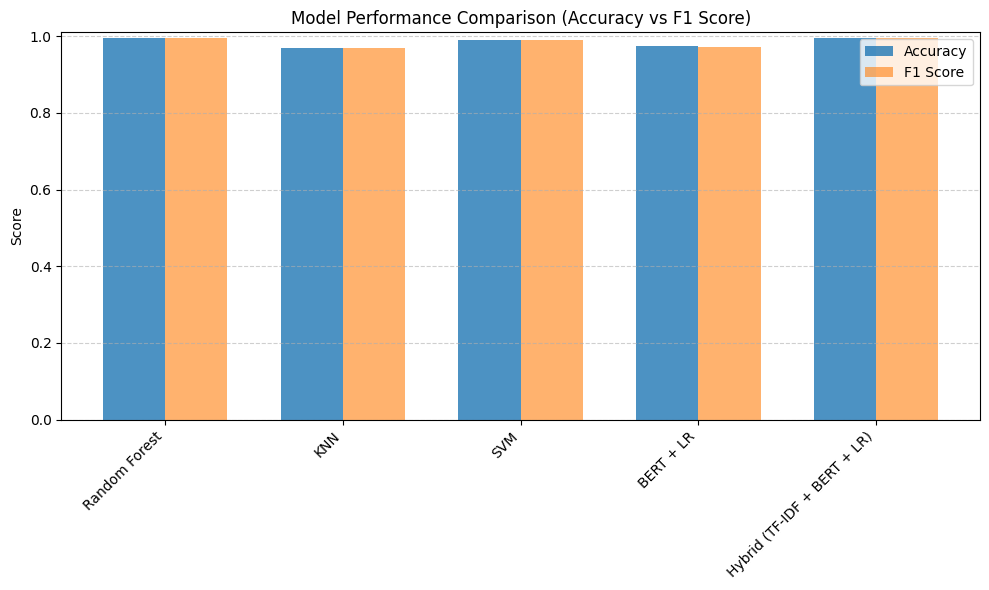

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set width and bar positions
bar_width = 0.35
x = np.arange(len(model_results_df))

# Create the plot
plt.figure(figsize=(10, 6))

plt.bar(x, model_results_df["Accuracy"], width=bar_width, label="Accuracy", alpha=0.8)
plt.bar(x + bar_width, model_results_df["F1 Score"], width=bar_width, label="F1 Score", alpha=0.6)

# Formatting
plt.xticks(x + bar_width / 2, model_results_df["Model"], rotation=45, ha='right')
plt.ylabel("Score")
plt.title("Model Performance Comparison (Accuracy vs F1 Score)")
plt.ylim(0.0, 1.01)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


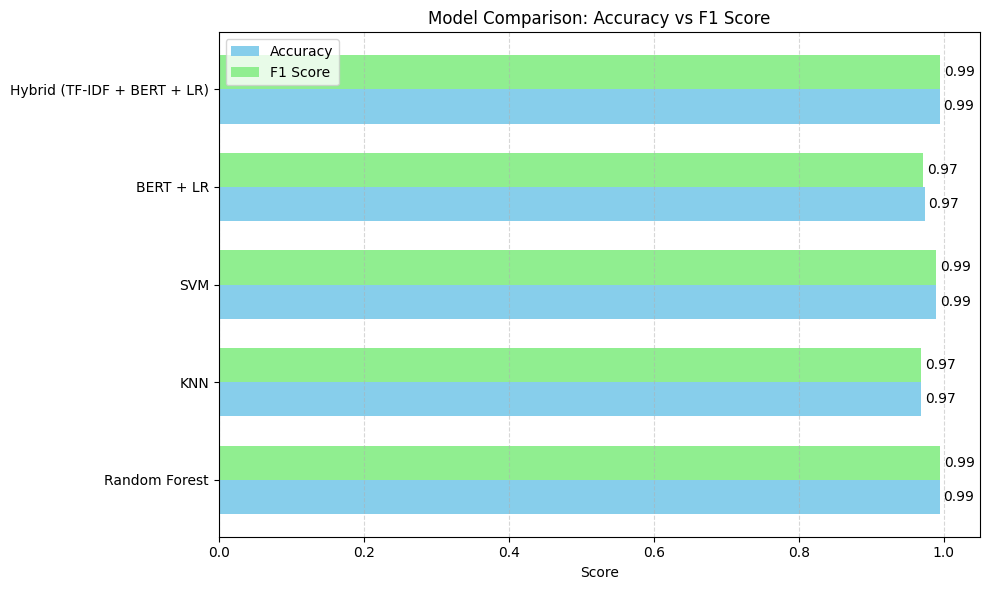

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Number of models and their names
models = model_results_df["Model"]
y_pos = np.arange(len(models))  # y-axis position for each model

# Bar width for grouped bars
bar_height = 0.35

plt.figure(figsize=(10, 6))

# Plot Accuracy
plt.barh(y_pos - bar_height/2, model_results_df["Accuracy"], height=bar_height, label='Accuracy', color='skyblue')

# Plot F1 Score
plt.barh(y_pos + bar_height/2, model_results_df["F1 Score"], height=bar_height, label='F1 Score', color='lightgreen')

# Add value labels
for i in range(len(models)):
    plt.text(model_results_df["Accuracy"][i] + 0.005, y_pos[i] - bar_height/2, f'{model_results_df["Accuracy"][i]:.2f}', va='center')
    plt.text(model_results_df["F1 Score"][i] + 0.005, y_pos[i] + bar_height/2, f'{model_results_df["F1 Score"][i]:.2f}', va='center')

# Label formatting
plt.xlabel("Score")
plt.yticks(y_pos, models)
plt.xlim(0.0, 1.05)
plt.title("Model Comparison: Accuracy vs F1 Score")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


**As observed from the evaluation metrics, both Random Forest and our Hybrid Model (TF-IDF + BERT + Logistic Regression) delivered strong performance across accuracy, precision, recall, and F1-score.**

**We selected the hybrid model as our final choice because it best aligns with the goals of our system. Unlike traditional models, the hybrid approach combines statistical keyword frequency (TF-IDF) with semantic understanding (BERT), allowing it to extract meaningful keywords and grasp the context of sentences within resumes.**

**This deeper understanding is essential for downstream tasks like personalized job recommendations, resume feedback, and skill gap analysis, making the hybrid model the most suitable for our application.**
